In [37]:
#imports
import tensorflow as tf
import os
import cv2
import filetype
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.metrics import Precision, Recall, BinaryAccuracy

In [16]:
#Using GPU instead: #Doesnt work
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

'c:\\mycode\\python\\happy_or_sad'

In [19]:
#Remove Dodgy images
DIRECTORY  = os.getcwd()
data_dir = f"{DIRECTORY}\\data"
image_exts = {"jpeg", "jpg", "bmp", "png"}
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = filetype.guess(image_path)
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")
            # os.remove(image)



Issue with image c:\mycode\python\happy_or_sad\data\happy\05-12-21-happy-people.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1-2.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\154006829.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\170404-happy-workers-feature.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1902539.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1902540.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1902587.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1920px-face-smile.svg_.png.jpg
Issue with image c:\mycode\python\happy_or_sad\data\happy\1HEoLBLidT2u4mhJ0oiD

Found 305 files belonging to 2 classes.


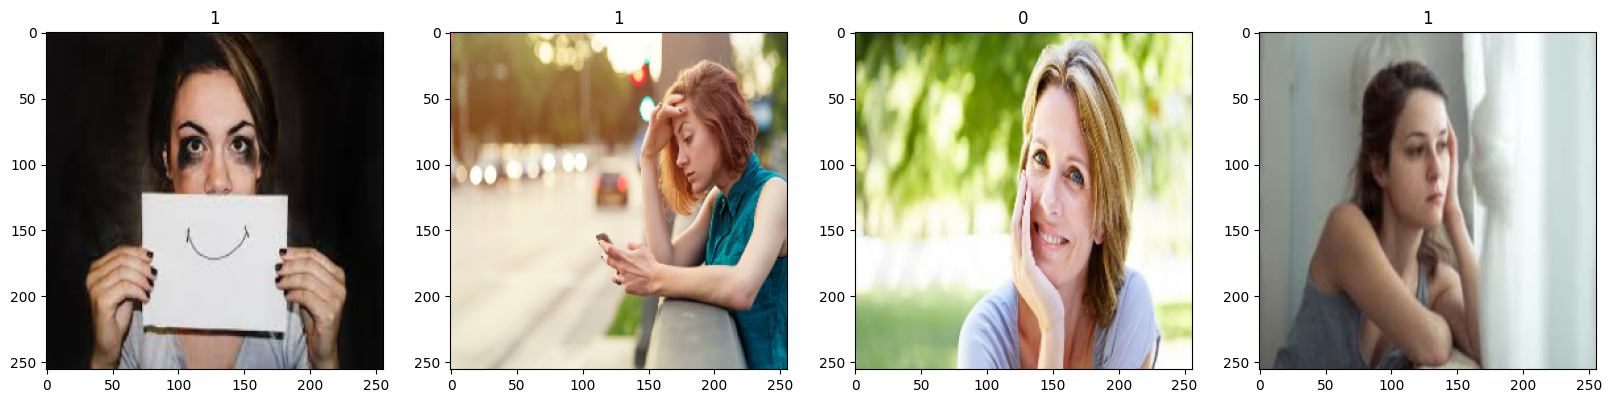

In [24]:
#Load the data
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fix, ax = plt.subplots(ncols=4, figsize=(20, 20))
for ind, image in enumerate(batch[0][:4]):
    ax[ind].imshow(image.astype(int))
    ax[ind].title.set_text(batch[1][ind])
    

In [26]:
#Scale the data
data = data.map(lambda x,y : (x/255, y))
data.as_numpy_iterator().next()

#Split the data

train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [29]:
#Building our deep learning model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [30]:
#Now to train our model with our dataset
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.7783 - accuracy: 0.5312 - val_loss: 0.7018 - val_accuracy: 0.4062
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6063 - accuracy: 0.6473 - val_loss: 0.5131 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 0.5175 - accuracy: 0.7634 - val_loss: 0.5053 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 12s 1s/step - loss: 0.4231 - accuracy: 0.8393 - val_loss: 0.2816 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.3378 - accuracy: 0.8839 - val_loss: 0.2589 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 0.2713 - accuracy: 0.8705 - val_loss: 0.1352 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.2239 - accuracy: 0.9241 - val_loss: 0.1852 - val_accuracy: 0.9375
Epoch 8/20
7/7 [==================

In [32]:
#Now to evaluate our model
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result(), sep=", ")

1/1 [==============================] - 0s 300ms/step
tf.Tensor(1.0, shape=(), dtype=float32), tf.Tensor(0.9, shape=(), dtype=float32), tf.Tensor(0.9411765, shape=(), dtype=float32)


In [35]:
#Test:
img = cv2.imread("154006829.jpg")
# plt.imshow(img)
# plt.show()
resize = tf.image.resize(img, (256, 256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')



1/1 [==============================] - 0s 37ms/step
Predicted class is Happy


In [39]:
model.save(os.path.join(f"{DIRECTORY}\\models",'imageclassifier.h5'))
new_model = load_model(f"{DIRECTORY}\\models\\imageclassifier.h5")
new_model.predict(np.expand_dims(resize/255, 0))


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 86ms/step


array([[0.00068]], dtype=float32)